In [1]:
# Essential libraries for data handling
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis

# Visualization libraries
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations
import seaborn as sns  # For drawing attractive and informative statistical graphics

# Import necessary libraries for PCA and data scaling
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# RandomForestClassifier is a popular ensemble learning method based on decision trees, used for both classification and regression tasks. It operates by constructing a multitude of decision trees during training for robust prediction.
from sklearn.ensemble import RandomForestClassifier

# SelectFromModel is a meta-transformer that selects features based on importance weights. It can be used with any estimator that assigns importance to each feature, such as RandomForestClassifier, to reduce the number of features.
from sklearn.feature_selection import SelectFromModel

# SelectKBest removes all but the k highest scoring features based on a chosen score function. f_classif is used as the score function for ANOVA F-value between label/feature for classification tasks, helpful in identifying significant features.
from sklearn.feature_selection import SelectKBest, f_classif

# ReliefF is a feature selection algorithm that is particularly well suited for identifying feature interactions that are predictive of a given outcome. It works by iteratively considering the value of each feature in distinguishing between similar instances that have different class labels.
from skrebate import ReliefF

# import warnings to filter and ignore the warnings to keep things clean
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read and store data in separate variables
two_additive_two_wayEpi = pd.read_csv('2Additive_2-wayEpi_100feat.txt', sep='\t')
two_wayEpi = pd.read_csv('2-wayEpi_100feat.txt', sep='\t')
four_way_additive = pd.read_csv('4-wayAdditive_100feat.txt', sep='\t')
four_way_additive_heterogeneous = pd.read_csv('4-wayHeterogeneous_100feat.txt', sep='\t')

## Data Analysis

### Display the first few rows of each dataset:

In [3]:
print("2Additive_2-wayEpi:")
two_additive_two_wayEpi.head()

2Additive_2-wayEpi:


,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,...,N91,N92,N93,N94,N95,M0P1,M0P2,M1P3,M1P4,Class
0,2,2,2,0,0,0,2,0,0,1,...,2,0,0,2,2,1,1,0,0,1
1,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,1,1,1,1
2,0,2,1,0,0,1,1,2,0,2,...,0,0,0,1,1,1,1,0,0,1
3,0,1,1,0,0,1,2,1,1,2,...,1,0,0,1,1,0,2,0,0,1
4,0,0,0,0,0,1,1,2,1,0,...,1,0,0,1,0,0,0,1,1,1


In [4]:
print("2-wayEpi:")
two_wayEpi.head()

2-wayEpi:


,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,...,N91,N92,N93,N94,N95,N96,N97,M0P1,M0P2,Class
0,0,0,0,0,2,0,1,1,0,2,...,1,1,1,1,0,0,0,0,0,1
1,1,0,0,1,0,1,1,0,0,1,...,0,1,1,0,0,0,0,0,0,1
2,0,1,0,2,0,1,0,0,0,0,...,0,1,1,1,0,1,2,0,0,1
3,2,1,0,2,1,0,0,1,0,0,...,0,0,2,0,0,0,1,0,0,1
4,1,0,0,0,2,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,1


In [5]:
print("4-wayAdditive:")
four_way_additive.head()

4-wayAdditive:


,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,...,N91,N92,N93,N94,N95,M0P1,M1P2,M2P3,M3P4,Class
0,0,1,2,1,1,0,1,0,1,0,...,1,0,0,1,0,1,0,2,0,1
1,0,0,2,1,1,0,0,0,1,1,...,2,1,1,1,2,0,1,1,2,1
2,0,1,0,1,0,0,0,2,0,0,...,0,1,1,1,1,2,0,2,0,1
3,0,1,0,1,2,1,1,2,1,1,...,1,0,0,2,1,0,1,2,1,1
4,0,0,2,0,1,0,0,1,0,0,...,0,1,0,1,1,0,1,2,1,1


In [6]:
print("4-wayHeterogeneous:")
four_way_additive_heterogeneous.head()

4-wayHeterogeneous:


,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,...,N91,N92,N93,N94,N95,M0P1,M1P2,M2P3,M3P4,Class
0,0,0,0,1,1,2,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1
1,1,1,1,0,1,1,0,0,2,1,...,0,0,0,0,0,1,1,1,0,1
2,1,0,1,0,2,0,0,1,0,2,...,0,0,0,0,0,1,1,0,0,1
3,0,1,0,0,0,1,1,1,1,1,...,2,0,0,0,1,1,0,0,0,1
4,0,2,0,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1


### Check Missing Values

In [7]:
# Check for missing values in two_additive_two_wayEpi
missing_values_two_additive_two_wayEpi = two_additive_two_wayEpi.isnull().sum().sum()

# Check for missing values in two_wayEpi
missing_values_two_wayEpi = two_wayEpi.isnull().sum().sum()

# Check for missing values in four_way_additive
missing_values_four_way_additive = four_way_additive.isnull().sum().sum()

# Check for missing values in four_way_additive_heterogeneous
missing_values_four_way_additive_heterogeneous = four_way_additive_heterogeneous.isnull().sum().sum()

In [8]:
# Print the results
print("Missing values in two_additive_two_wayEpi:")
print(missing_values_two_additive_two_wayEpi)

print("Missing values in two_wayEpi:")
print(missing_values_two_wayEpi)

print("Missing values in four_way_additive:")
print(missing_values_four_way_additive)

print("Missing values in four_way_additive_heterogeneous:")
print(missing_values_four_way_additive_heterogeneous)

Missing values in two_additive_two_wayEpi:
0
Missing values in two_wayEpi:
0
Missing values in four_way_additive:
0
Missing values in four_way_additive_heterogeneous:
0


#### No Missing values present in data, great.

## Exploratory Data Analysis

In [9]:
two_additive_two_wayEpi['Class'].value_counts()

1    500
0    500
Name: Class, dtype: int64

In [10]:
two_wayEpi['Class'].value_counts()

1    500
0    500
Name: Class, dtype: int64

In [11]:
four_way_additive['Class'].value_counts()

1    500
0    500
Name: Class, dtype: int64

In [12]:
four_way_additive_heterogeneous['Class'].value_counts()

1    500
0    500
Name: Class, dtype: int64

## Data Distribution Analysis

#### Setting General Theme

In [13]:
# Set global aesthetics using seaborn style for consistency and a professional look
plt.style.use('seaborn')
# Configure global font settings for readability
plt.rc('font', family='Arial', size=14)

colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#ff7f0e']  # Custom colors

# font sizes
SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

# bar widths
bar_width = 0.15

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

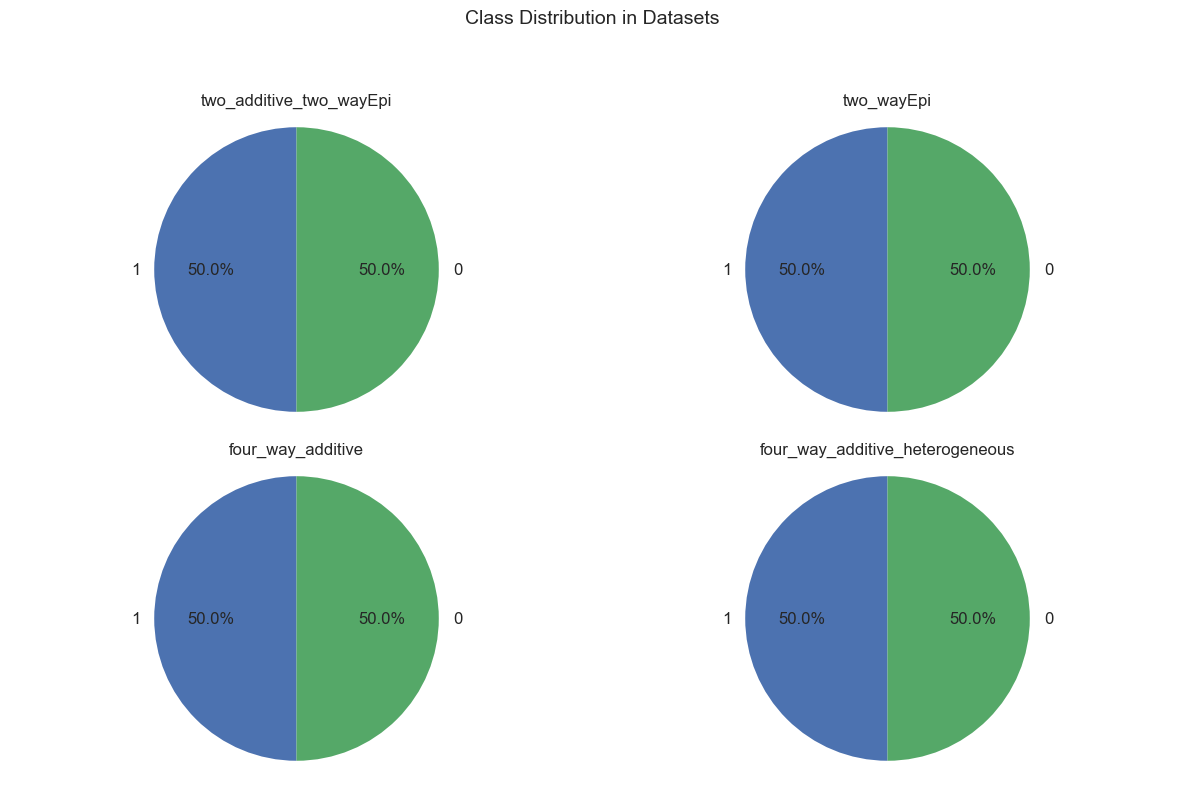

In [14]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Class Distribution in Datasets")

# Create pie plots for class distribution in each data
def create_pie_plot(data, title, ax):
    class_counts = data['Class'].value_counts()
    labels = class_counts.index
    sizes = class_counts.values

    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title(title)

# Create pie plots for each dataset within subplots
create_pie_plot(two_additive_two_wayEpi, "two_additive_two_wayEpi", axes[0, 0])
create_pie_plot(two_wayEpi, "two_wayEpi", axes[0, 1])
create_pie_plot(four_way_additive, "four_way_additive", axes[1, 0])
create_pie_plot(four_way_additive_heterogeneous, "four_way_additive_heterogeneous", axes[1, 1])

# Adjust layout and show the plot
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

In [15]:
# Extract features (X) and class labels (y)
X = two_wayEpi.drop('Class', axis=1)
y = two_wayEpi['Class']

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for 2D visualization
X_pca = pca.fit_transform(X)

# Create a DataFrame with PCA components and class labels
pca_df = pd.DataFrame(data={'PCA1': X_pca[:, 0], 'PCA2': X_pca[:, 1], 'Class': y})

In [16]:
pca_df

,PCA1,PCA2,Class
0,-0.389207,-0.594165,1
1,-2.253304,0.388267,1
2,1.112341,0.473946,1
3,1.496612,0.117310,1
4,0.168653,-1.266216,1
...,...,...,...
995,-0.031644,-0.038893,0
996,1.151298,0.880561,0
997,1.768375,0.673094,0
998,-1.554254,0.151152,0


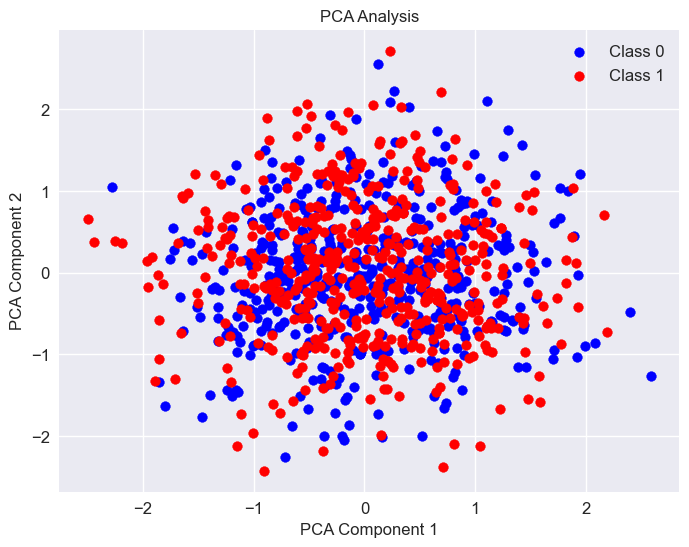

In [17]:
# Plot the PCA graph
plt.figure(figsize=(8, 6))
plt.scatter(pca_df[pca_df['Class'] == 0]['PCA1'], pca_df[pca_df['Class'] == 0]['PCA2'], label='Class 0', c='blue')
plt.scatter(pca_df[pca_df['Class'] == 1]['PCA1'], pca_df[pca_df['Class'] == 1]['PCA2'], label='Class 1', c='red')
plt.title('PCA Analysis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Extract features (X) and class labels (y)
X = two_additive_two_wayEpi.drop('Class', axis=1)
y = two_additive_two_wayEpi['Class']


# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for 2D visualization
X_pca = pca.fit_transform(X)

# Create a DataFrame with PCA components and class labels
pca_df = pd.DataFrame(data={'PCA1': X_pca[:, 0], 'PCA2': X_pca[:, 1], 'Class': y})

In [19]:
pca_df

,PCA1,PCA2,Class
0,0.143208,-0.304555,1
1,-0.771990,-2.504366,1
2,-0.569831,0.116027,1
3,-0.378528,0.316892,1
4,0.527674,1.994750,1
...,...,...,...
995,-0.360885,-0.431670,0
996,0.712456,-1.699689,0
997,-0.195796,0.487107,0
998,0.723837,0.538431,0


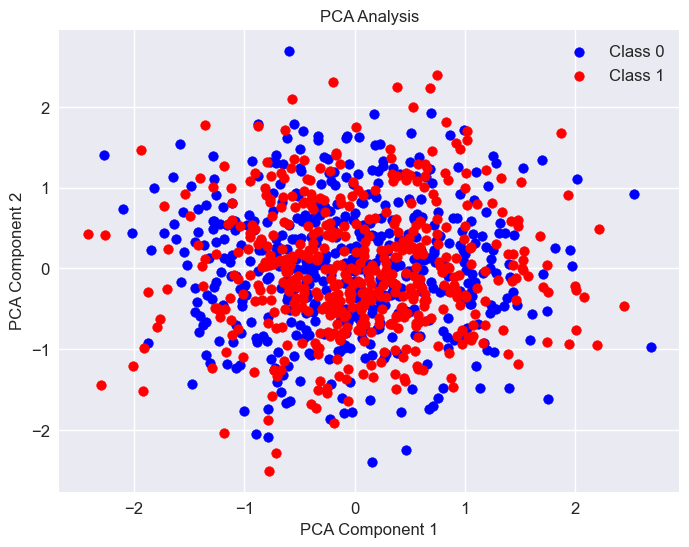

In [20]:
# Plot the PCA graph
plt.figure(figsize=(8, 6))
plt.scatter(pca_df[pca_df['Class'] == 0]['PCA1'], pca_df[pca_df['Class'] == 0]['PCA2'], label='Class 0', c='blue')
plt.scatter(pca_df[pca_df['Class'] == 1]['PCA1'], pca_df[pca_df['Class'] == 1]['PCA2'], label='Class 1', c='red')
plt.title('PCA Analysis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Extract features (X) and class labels (y)
X = four_way_additive.drop('Class', axis=1)
y = four_way_additive['Class']

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for 2D visualization
X_pca = pca.fit_transform(X)

# Create a DataFrame with PCA components and class labels
pca_df = pd.DataFrame(data={'PCA1': X_pca[:, 0], 'PCA2': X_pca[:, 1], 'Class': y})

In [22]:
pca_df

,PCA1,PCA2,Class
0,-0.209747,1.603992,1
1,-0.969466,-0.770498,1
2,-0.223986,1.100594,1
3,-0.899840,-0.125906,1
4,-0.832946,0.778577,1
...,...,...,...
995,1.462256,0.012431,0
996,1.428130,-0.661849,0
997,1.534576,-0.683016,0
998,1.456210,-0.872835,0


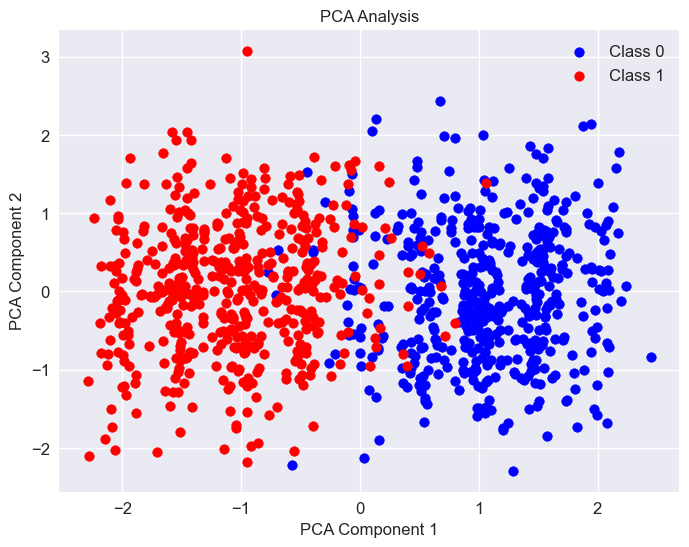

In [23]:
# Plot the PCA graph
plt.figure(figsize=(8, 6))
plt.scatter(pca_df[pca_df['Class'] == 0]['PCA1'], pca_df[pca_df['Class'] == 0]['PCA2'], label='Class 0', c='blue')
plt.scatter(pca_df[pca_df['Class'] == 1]['PCA1'], pca_df[pca_df['Class'] == 1]['PCA2'], label='Class 1', c='red')
plt.title('PCA Analysis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# Extract features (X) and class labels (y)
X = four_way_additive_heterogeneous.drop('Class', axis=1)
y = four_way_additive_heterogeneous['Class']

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for 2D visualization
X_pca = pca.fit_transform(X)

# Create a DataFrame with PCA components and class labels
pca_df = pd.DataFrame(data={'PCA1': X_pca[:, 0], 'PCA2': X_pca[:, 1], 'Class': y})

In [25]:
pca_df

,PCA1,PCA2,Class
0,0.542655,1.130241,1
1,0.795684,-0.867884,1
2,0.043083,0.503670,1
3,0.302676,-0.251726,1
4,1.534489,0.479073,1
...,...,...,...
995,-0.398795,-0.592354,0
996,-0.150086,0.203452,0
997,0.330299,0.239673,0
998,-0.543552,0.641355,0


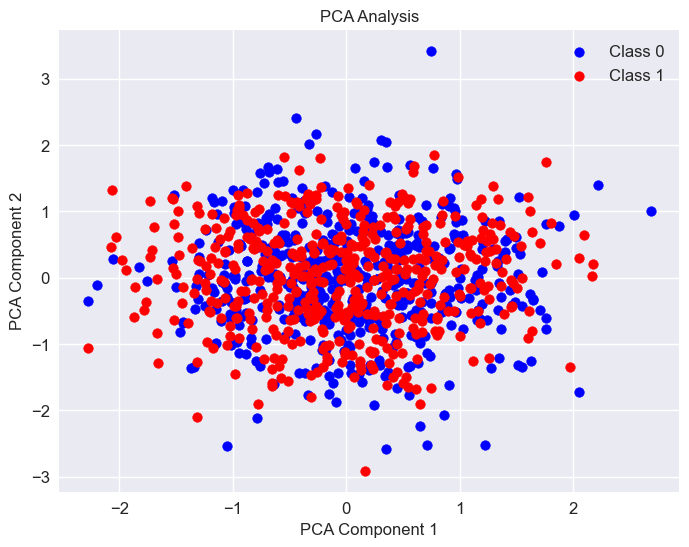

In [26]:
# Plot the PCA graph
plt.figure(figsize=(8, 6))
plt.scatter(pca_df[pca_df['Class'] == 0]['PCA1'], pca_df[pca_df['Class'] == 0]['PCA2'], label='Class 0', c='blue')
plt.scatter(pca_df[pca_df['Class'] == 1]['PCA1'], pca_df[pca_df['Class'] == 1]['PCA2'], label='Class 1', c='red')
plt.title('PCA Analysis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
def calculateFeatureImportance(data, datasetName, k):
    """
    Calculate and visualize feature importance for a given dataset using multiple methods.
    
    Parameters:
    - data (DataFrame): The dataset containing features and a target class.
    - datasetName (str): A name for the dataset, used for visualization titles.
    - k (int): The number of top features to select.
    
    Returns:
    - A tuple containing:
        - feature_importances: Array of feature importances from Random Forest.
        - selector: Fitted SelectKBest object for ANOVA F-statistic.
        - relief: Fitted ReliefF object.
    """
    
    # Log starting of feature selection process
    print(f"----------------Feature Selection in dataset {datasetName}-------------------")
    
    # Split data into features (X) and target (y)
    X = data.drop('Class', axis=1)
    y = data['Class']

    # Random Forest for feature importance
    clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    clf.fit(X, y)
    feature_importances = clf.feature_importances_

    # Visualizing Random Forest feature importances
    print("Selected features using Random Forest Classifier Feature Importance")
    plt.figure(figsize=(10, 6))
    plt.title(f"Feature Importances in dataset {datasetName}")
    feature_scores = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)
    top_features = feature_scores[:10]
    sns.barplot(x=top_features, y=top_features.index)
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.show()

    # Feature selection using ANOVA F-statistic
    print("\nFeature selection using ANOVA F-statistic: ")
    selector = SelectKBest(score_func=f_classif, k=k)
    selector.fit(X, y)
    selected_feature_names = X.columns[selector.get_support()]
    print("Selected predictive features:", selected_feature_names)
    
    # Feature selection using Relief-based algorithm
    print("\nFeature selection using Relief-based algorithm:")
    relief = ReliefF(n_features_to_select=k)
    relief.fit(X.values, y.values)
    selected_feature_names = X.columns[relief.top_features_[:k]]
    print("Selected predictive features:", selected_feature_names)
    
    return feature_importances, selector, relief


----------------Feature Selection in dataset 2-wayEpi-------------------
Selected features using Random Forest Classifier Feature Importance


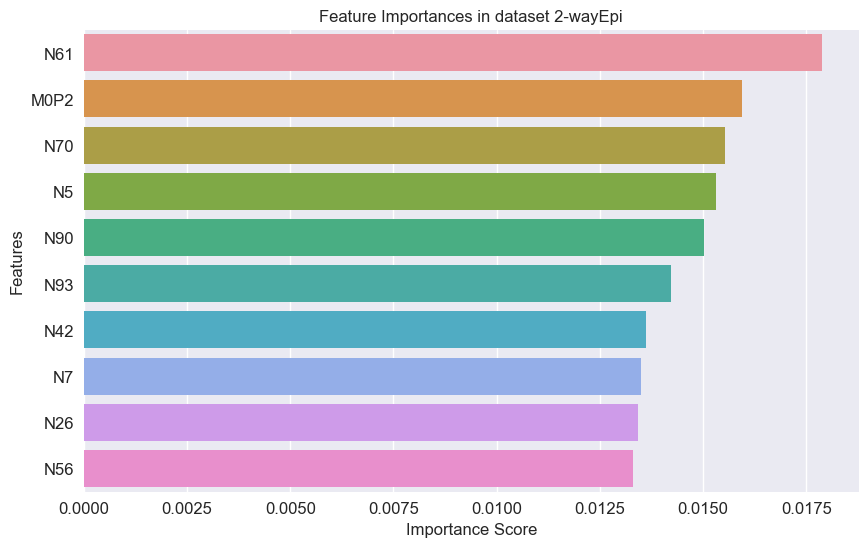


Feature selection using ANOVA F-statistic: 
Selected predictive features: Index(['N2', 'N5', 'N19', 'N20', 'N26', 'N36', 'N53', 'N63', 'N70', 'N72'], dtype='object')

Feature selection using Relief-based algorithm:
Selected predictive features: Index(['M0P2', 'M0P1', 'N61', 'N5', 'N62', 'N26', 'N93', 'N66', 'N91', 'N31'], dtype='object')


In [28]:
feature_importances, selector, relief = calculateFeatureImportance(two_wayEpi,"2-wayEpi", 10)

----------------Feature Selection in dataset 2-additive_two_wayEpi-------------------
Selected features using Random Forest Classifier Feature Importance


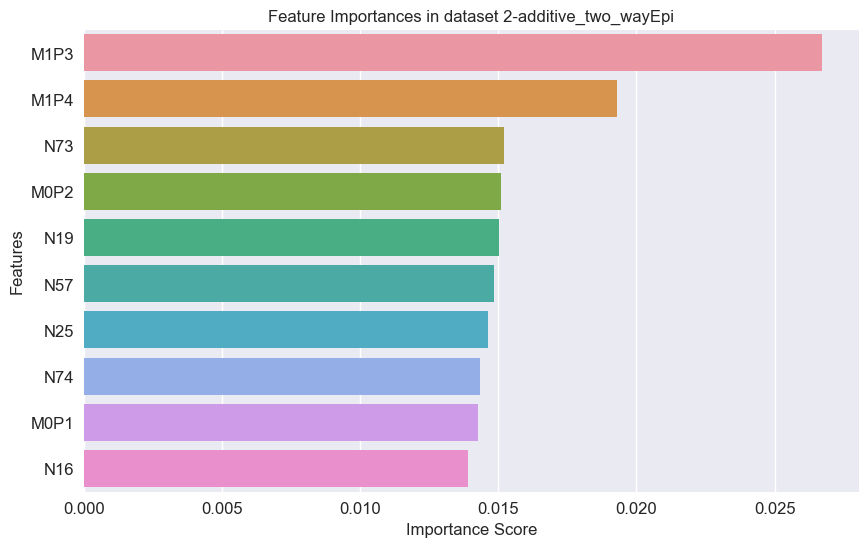


Feature selection using ANOVA F-statistic: 
Selected predictive features: Index(['N13', 'N38', 'N44', 'N71', 'N72', 'N73', 'N85', 'N87', 'N94', 'M1P4'], dtype='object')

Feature selection using Relief-based algorithm:
Selected predictive features: Index(['M0P1', 'M0P2', 'M1P4', 'M1P3', 'N73', 'N88', 'N72', 'N37', 'N64',
       'N22'],
      dtype='object')


In [29]:
feature_importances, selector, relief = calculateFeatureImportance(two_additive_two_wayEpi,"2-additive_two_wayEpi", 10)

----------------Feature Selection in dataset four_way_additive-------------------
Selected features using Random Forest Classifier Feature Importance


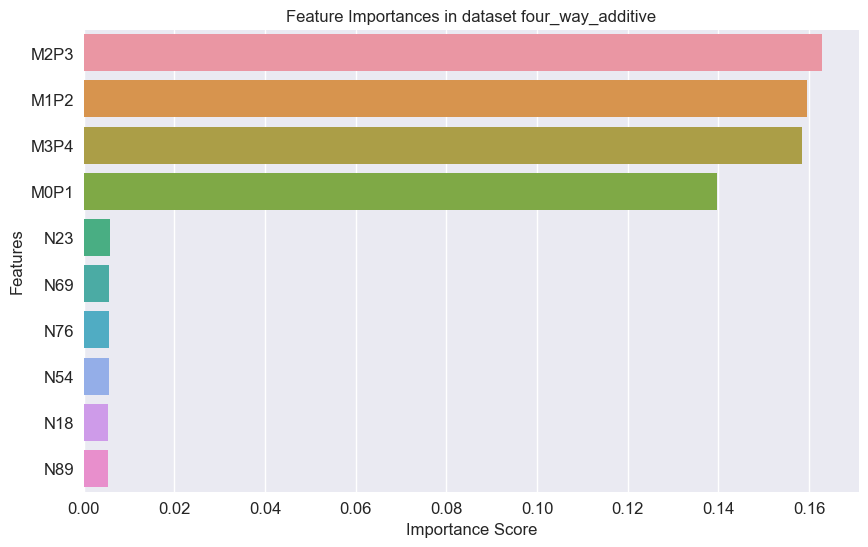


Feature selection using ANOVA F-statistic: 
Selected predictive features: Index(['N6', 'N22', 'N50', 'N55', 'N60', 'N89', 'M0P1', 'M1P2', 'M2P3',
       'M3P4'],
      dtype='object')

Feature selection using Relief-based algorithm:
Selected predictive features: Index(['M2P3', 'M0P1', 'M1P2', 'M3P4', 'N15', 'N87', 'N22', 'N66', 'N6',
       'N73'],
      dtype='object')


In [30]:
feature_importances, selector, relief = calculateFeatureImportance(four_way_additive,"four_way_additive", 10)

----------------Feature Selection in dataset four_way_additive_heterogeneous-------------------
Selected features using Random Forest Classifier Feature Importance


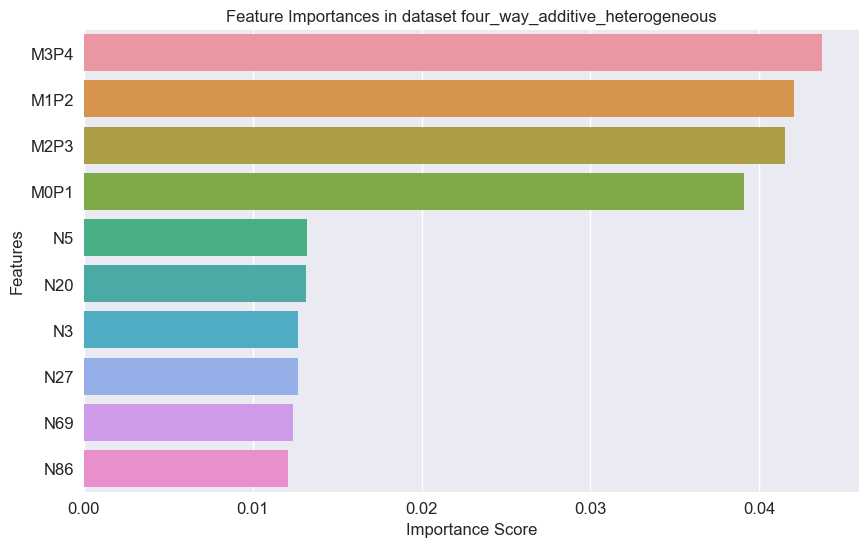


Feature selection using ANOVA F-statistic: 
Selected predictive features: Index(['N8', 'N20', 'N33', 'N48', 'N65', 'N90', 'M0P1', 'M1P2', 'M2P3',
       'M3P4'],
      dtype='object')

Feature selection using Relief-based algorithm:
Selected predictive features: Index(['M3P4', 'M1P2', 'M2P3', 'M0P1', 'N41', 'N67', 'N28', 'N72', 'N40',
       'N2'],
      dtype='object')


In [31]:
feature_importances, selector, relief = calculateFeatureImportance(four_way_additive_heterogeneous,"four_way_additive_heterogeneous", 10)

## Model Training

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

### Model Building-two_additive_two_wayEpi

In [33]:
two_additive_two_wayEpi

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,...,N91,N92,N93,N94,N95,M0P1,M0P2,M1P3,M1P4,Class
0,2,2,2,0,0,0,2,0,0,1,...,2,0,0,2,2,1,1,0,0,1
1,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,1,1,1,1
2,0,2,1,0,0,1,1,2,0,2,...,0,0,0,1,1,1,1,0,0,1
3,0,1,1,0,0,1,2,1,1,2,...,1,0,0,1,1,0,2,0,0,1
4,0,0,0,0,0,1,1,2,1,0,...,1,0,0,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,0,0,0,1,1,1,0,1,...,0,0,0,0,0,0,2,0,0,0
996,1,1,0,0,0,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
997,1,1,1,0,0,1,1,0,0,0,...,0,0,1,1,0,1,0,1,0,0
998,1,0,1,0,0,0,1,2,0,1,...,1,0,1,1,1,0,1,0,0,0


In [34]:
features = two_additive_two_wayEpi.iloc[:,-5:-1]
features

,M0P1,M0P2,M1P3,M1P4
0,1,1,0,0
1,1,1,1,1
2,1,1,0,0
3,0,2,0,0
4,0,0,1,1
...,...,...,...,...
995,0,2,0,0
996,0,0,0,0
997,1,0,1,0
998,0,1,0,0


In [35]:
labels = two_additive_two_wayEpi['Class']
labels

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Class, Length: 1000, dtype: int64

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42,stratify=labels)

In [37]:
y_train.value_counts()

1    400
0    400
Name: Class, dtype: int64

In [38]:
# Initialize the classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),  # For linearly separable data
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),  # For non-linear decisions
    ('Random Forest', RandomForestClassifier(random_state=42)),  # Ensemble of decision trees
    ('Support Vector Machine', SVC(probability=True, random_state=42)),  # For maximum margin separation
    ('K-Nearest Neighbors', KNeighborsClassifier())  # For instance-based learning
]

# Initialize dictionaries to store evaluation metrics
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}
# Initialize dictionaries to store confusion matrices
confusion_matrices = {}

In [39]:
# Train and evaluate each classifier
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_prob = classifier.predict_proba(X_test)[:, 1]  # For ROC-AUC

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm

    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    precision_scores[name] = precision_score(y_test, y_pred, average='binary')
    recall_scores[name] = recall_score(y_test, y_pred, average='binary')
    f1_scores[name] = f1_score(y_test, y_pred, average='binary')

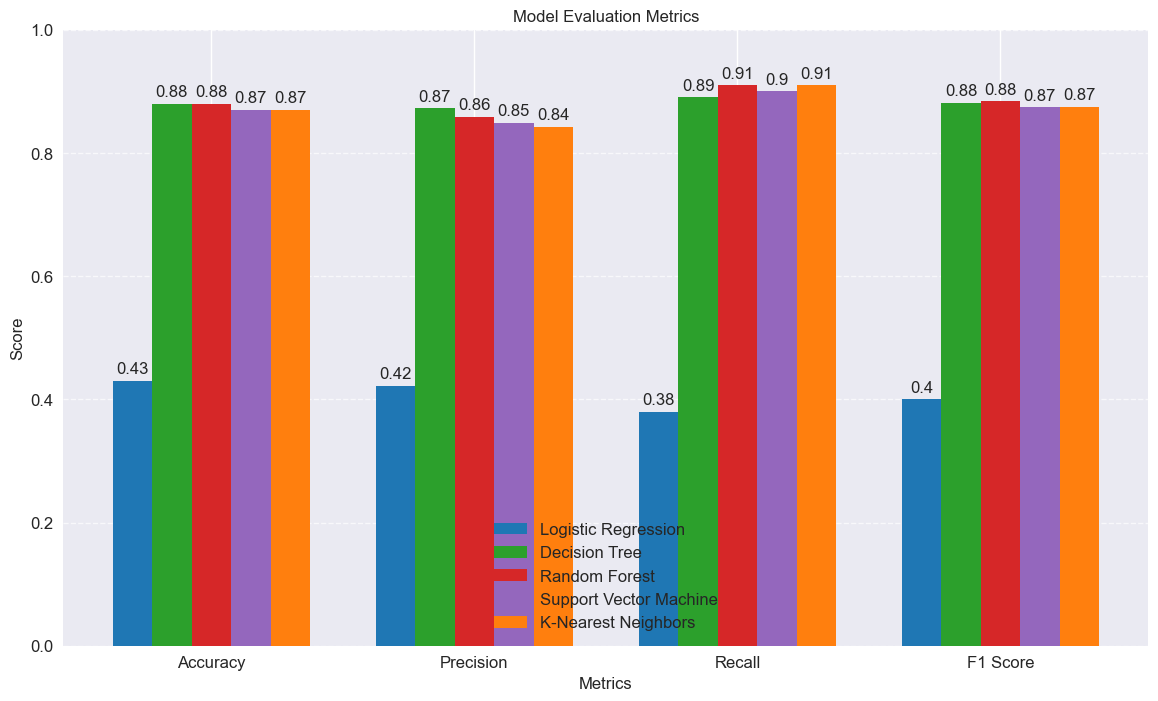

In [40]:
barplots = []
fig, axs = plt.subplots(figsize=(14, 8))

for i, (model, model_name) in enumerate(classifiers):
    model_scores = []
    model_scores.append(accuracy_scores.get(model))
    model_scores.append(precision_scores.get(model))
    model_scores.append(recall_scores.get(model))
    model_scores.append(f1_scores.get(model))
    
    # Adjust the position of bars to create space between them
    x_position = np.arange(len(model_scores)) + (i * bar_width)
    barplot = axs.bar(x_position, model_scores, bar_width, color=colors[i], label=model_name)
    for bar in barplot:
            height = bar.get_height()
            axs.annotate('{}'.format(round(height, 2)),
                         xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')
    barplots.append(barplot)
    
    
# Add labels, legends, and titles
axs.set_xticks(np.arange(len(model_scores)) + ((len(classifiers) - 1) * bar_width) / 2)
axs.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1 Score'])
axs.legend([model_name for (model_name,_) in classifiers], loc='lower center')  

plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.ylim(0, 1)  # Set y-axis limit

plt.savefig(f"model-Comparision-two_additive_two_wayEpi.png",dpi=300,bbox_inches='tight')
plt.show()

In [41]:
# Create a function to generate a report for a classifier
def generate_report(classifier_name, confusion_matrix, accuracy, precision, recall, f1):
    print(f"Classifier: {classifier_name}")
    
    # Display the confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix)
    
    # Display key evaluation metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    
    # Display classification report
    print("Classification Report:")
    print(classification_report(y_test, classifier.predict(X_test), target_names=["1","0"]))
    print("\n" + "="*50 + "\n")  # Separator



# Iterate through classifiers and generate reports
for name, classifier in classifiers:
    generate_report(name, confusion_matrices[name], accuracy_scores[name], 
                    precision_scores[name], recall_scores[name], f1_scores[name])

Classifier: Logistic Regression
Confusion Matrix:
[[48 52]
 [62 38]]
Accuracy: 0.43
Precision: 0.42
Recall: 0.38
F1 Score: 0.40
Classification Report:
              precision    recall  f1-score   support

           1       0.44      0.48      0.46       100
           0       0.42      0.38      0.40       100

    accuracy                           0.43       200
   macro avg       0.43      0.43      0.43       200
weighted avg       0.43      0.43      0.43       200



Classifier: Decision Tree
Confusion Matrix:
[[87 13]
 [11 89]]
Accuracy: 0.88
Precision: 0.87
Recall: 0.89
F1 Score: 0.88
Classification Report:
              precision    recall  f1-score   support

           1       0.89      0.87      0.88       100
           0       0.87      0.89      0.88       100

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



Classifier: Random Forest
Confusion Matrix:
[[

In [42]:
# Create a DataFrame
evaluation_results = pd.DataFrame({
    'Accuracy': accuracy_scores.values(),
    'Precision': precision_scores.values(),
    'Recall': recall_scores.values(),
    'F1 Score': f1_scores.values()
}, index=accuracy_scores.keys())

# Display the DataFrame
evaluation_results

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.43,0.422222,0.38,0.400000
Decision Tree,0.88,0.872549,0.89,0.881188
Random Forest,0.88,0.858491,0.91,0.883495
Support Vector Machine,0.87,0.849057,0.90,0.873786
K-Nearest Neighbors,0.87,0.842593,0.91,0.875000


In [43]:
evaluation_results.sort_values(by=list(evaluation_results.columns),ascending=False)

,Accuracy,Precision,Recall,F1 Score
Decision Tree,0.88,0.872549,0.89,0.881188
Random Forest,0.88,0.858491,0.91,0.883495
Support Vector Machine,0.87,0.849057,0.90,0.873786
K-Nearest Neighbors,0.87,0.842593,0.91,0.875000
Logistic Regression,0.43,0.422222,0.38,0.400000


## Model Building-two_wayEpi

In [44]:
two_wayEpi

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,...,N91,N92,N93,N94,N95,N96,N97,M0P1,M0P2,Class
0,0,0,0,0,2,0,1,1,0,2,...,1,1,1,1,0,0,0,0,0,1
1,1,0,0,1,0,1,1,0,0,1,...,0,1,1,0,0,0,0,0,0,1
2,0,1,0,2,0,1,0,0,0,0,...,0,1,1,1,0,1,2,0,0,1
3,2,1,0,2,1,0,0,1,0,0,...,0,0,2,0,0,0,1,0,0,1
4,1,0,0,0,2,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,0,0,0,2,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0
996,0,2,0,1,2,1,0,1,1,1,...,0,0,1,0,0,0,1,0,0,0
997,1,1,0,0,1,0,0,1,0,1,...,0,1,2,0,0,0,1,0,1,0
998,0,0,0,1,1,1,1,0,0,2,...,1,0,1,1,0,0,0,1,0,0


In [45]:
features = two_wayEpi.iloc[:,-3:-1]
features

,M0P1,M0P2
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
995,0,0
996,0,0
997,0,1
998,1,0


In [46]:
labels = two_wayEpi['Class']
labels

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Class, Length: 1000, dtype: int64

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42,stratify=labels)

In [48]:
y_train.value_counts()

1    400
0    400
Name: Class, dtype: int64

In [49]:
# Initialize the classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Support Vector Machine', SVC(probability=True, random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

# Initialize dictionaries to store evaluation metrics
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}
# Initialize dictionaries to store confusion matrices
confusion_matrices = {}

In [50]:
# Train and evaluate each classifier
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_prob = classifier.predict_proba(X_test)[:, 1]  # For ROC-AUC

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm

    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    precision_scores[name] = precision_score(y_test, y_pred, average='binary')
    recall_scores[name] = recall_score(y_test, y_pred, average='binary')
    f1_scores[name] = f1_score(y_test, y_pred, average='binary')

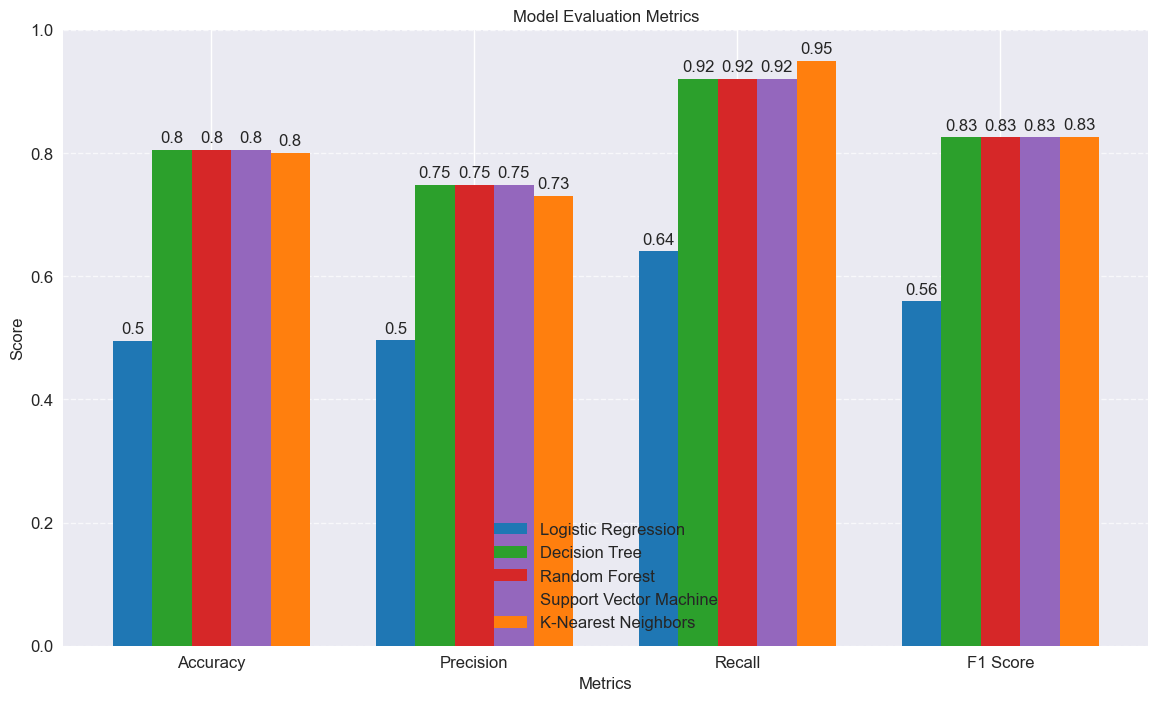

In [51]:
barplots = []
fig, axs = plt.subplots(figsize=(14, 8))

for i, (model, model_name) in enumerate(classifiers):
    model_scores = []
    model_scores.append(accuracy_scores.get(model))
    model_scores.append(precision_scores.get(model))
    model_scores.append(recall_scores.get(model))
    model_scores.append(f1_scores.get(model))
    
    # Adjust the position of bars to create space between them
    x_position = np.arange(len(model_scores)) + (i * bar_width)
    barplot = axs.bar(x_position, model_scores, bar_width, color=colors[i], label=model_name)
    for bar in barplot:
            height = bar.get_height()
            axs.annotate('{}'.format(round(height, 2)),
                         xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')
    barplots.append(barplot)
    
    
# Add labels, legends, and titles
axs.set_xticks(np.arange(len(model_scores)) + ((len(classifiers) - 1) * bar_width) / 2)
axs.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1 Score'])
axs.legend([model_name for (model_name,_) in classifiers], loc='lower center')  

plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.ylim(0, 1)  # Set y-axis limit
plt.savefig(f"model-Comparision-two_wayEpi.png",dpi=300,bbox_inches='tight')
plt.show()

In [52]:
# Iterate through classifiers and generate reports
for name, classifier in classifiers:
    generate_report(name, confusion_matrices[name], accuracy_scores[name], 
                    precision_scores[name], recall_scores[name], f1_scores[name])

Classifier: Logistic Regression
Confusion Matrix:
[[35 65]
 [36 64]]
Accuracy: 0.49
Precision: 0.50
Recall: 0.64
F1 Score: 0.56
Classification Report:
              precision    recall  f1-score   support

           1       0.49      0.35      0.41       100
           0       0.50      0.64      0.56       100

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.48       200
weighted avg       0.49      0.49      0.48       200



Classifier: Decision Tree
Confusion Matrix:
[[69 31]
 [ 8 92]]
Accuracy: 0.81
Precision: 0.75
Recall: 0.92
F1 Score: 0.83
Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.69      0.78       100
           0       0.75      0.92      0.83       100

    accuracy                           0.81       200
   macro avg       0.82      0.80      0.80       200
weighted avg       0.82      0.81      0.80       200



Classifier: Random Forest
Confusion Matrix:
[[

In [53]:
# Create a DataFrame
evaluation_results = pd.DataFrame({
    'Accuracy': accuracy_scores.values(),
    'Precision': precision_scores.values(),
    'Recall': recall_scores.values(),
    'F1 Score': f1_scores.values()
}, index=accuracy_scores.keys())

# Display the DataFrame
evaluation_results

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.495,0.496124,0.64,0.558952
Decision Tree,0.805,0.747967,0.92,0.825112
Random Forest,0.805,0.747967,0.92,0.825112
Support Vector Machine,0.805,0.747967,0.92,0.825112
K-Nearest Neighbors,0.800,0.730769,0.95,0.826087


In [54]:
evaluation_results.sort_values(by=list(evaluation_results.columns),ascending=False)

,Accuracy,Precision,Recall,F1 Score
Decision Tree,0.805,0.747967,0.92,0.825112
Random Forest,0.805,0.747967,0.92,0.825112
Support Vector Machine,0.805,0.747967,0.92,0.825112
K-Nearest Neighbors,0.800,0.730769,0.95,0.826087
Logistic Regression,0.495,0.496124,0.64,0.558952


## Model Building-four_way_additive

In [55]:
four_way_additive

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,...,N91,N92,N93,N94,N95,M0P1,M1P2,M2P3,M3P4,Class
0,0,1,2,1,1,0,1,0,1,0,...,1,0,0,1,0,1,0,2,0,1
1,0,0,2,1,1,0,0,0,1,1,...,2,1,1,1,2,0,1,1,2,1
2,0,1,0,1,0,0,0,2,0,0,...,0,1,1,1,1,2,0,2,0,1
3,0,1,0,1,2,1,1,2,1,1,...,1,0,0,2,1,0,1,2,1,1
4,0,0,2,0,1,0,0,1,0,0,...,0,1,0,1,1,0,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,1,1,1,0,0,0,1,0,...,1,0,1,1,2,1,2,0,0,0
996,1,1,0,1,1,1,0,1,2,1,...,2,0,2,1,1,2,1,0,0,0
997,0,1,2,0,0,0,0,0,0,1,...,1,0,0,1,1,1,2,0,0,0
998,0,0,1,1,0,0,0,0,0,0,...,1,0,1,1,0,2,2,0,1,0


In [56]:
features = four_way_additive.iloc[:,-5:-1]
features

,M0P1,M1P2,M2P3,M3P4
0,1,0,2,0
1,0,1,1,2
2,2,0,2,0
3,0,1,2,1
4,0,1,2,1
...,...,...,...,...
995,1,2,0,0
996,2,1,0,0
997,1,2,0,0
998,2,2,0,1


In [57]:
labels = four_way_additive['Class']
labels

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Class, Length: 1000, dtype: int64

In [58]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42,stratify=labels)

In [59]:
y_train.value_counts()

1    400
0    400
Name: Class, dtype: int64

In [60]:
# Initialize the classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Support Vector Machine', SVC(probability=True, random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

# Initialize dictionaries to store evaluation metrics
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}
# Initialize dictionaries to store confusion matrices
confusion_matrices = {}

In [61]:
# Train and evaluate each classifier
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_prob = classifier.predict_proba(X_test)[:, 1]  # For ROC-AUC

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm

    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    precision_scores[name] = precision_score(y_test, y_pred, average='binary')
    recall_scores[name] = recall_score(y_test, y_pred, average='binary')
    f1_scores[name] = f1_score(y_test, y_pred, average='binary')

# 

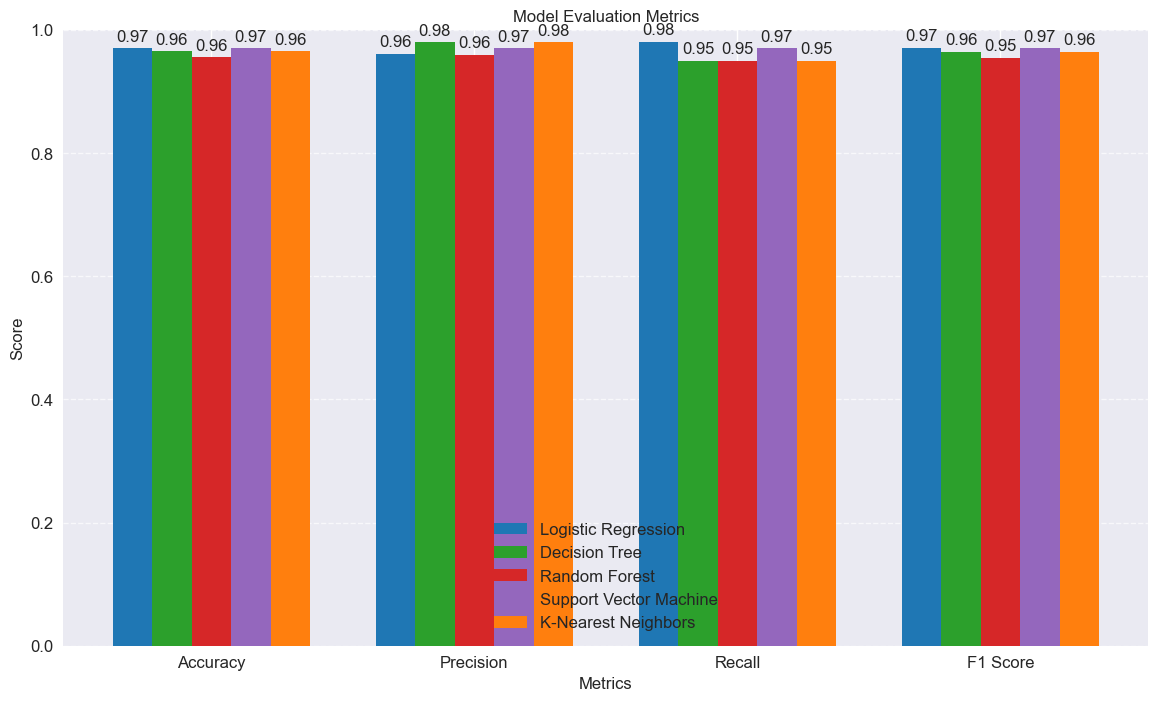

In [62]:
barplots = []
fig, axs = plt.subplots(figsize=(14, 8))

for i, (model, model_name) in enumerate(classifiers):
    model_scores = []
    model_scores.append(accuracy_scores.get(model))
    model_scores.append(precision_scores.get(model))
    model_scores.append(recall_scores.get(model))
    model_scores.append(f1_scores.get(model))
    
    # Adjust the position of bars to create space between them
    x_position = np.arange(len(model_scores)) + (i * bar_width)
    barplot = axs.bar(x_position, model_scores, bar_width, color=colors[i], label=model_name)
    for bar in barplot:
            height = bar.get_height()
            axs.annotate('{}'.format(round(height, 2)),
                         xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')
    barplots.append(barplot)
    
    
# Add labels, legends, and titles
axs.set_xticks(np.arange(len(model_scores)) + ((len(classifiers) - 1) * bar_width) / 2)
axs.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1 Score'])
axs.legend([model_name for (model_name,_) in classifiers], loc='lower center')  

plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.ylim(0, 1)  # Set y-axis limit
plt.savefig(f"model-Comparision-four_way_additive.png",dpi=300,bbox_inches='tight')
plt.show()


In [63]:
# Iterate through classifiers and generate reports
for name, classifier in classifiers:
    generate_report(name, confusion_matrices[name], accuracy_scores[name], 
                    precision_scores[name], recall_scores[name], f1_scores[name])

Classifier: Logistic Regression
Confusion Matrix:
[[96  4]
 [ 2 98]]
Accuracy: 0.97
Precision: 0.96
Recall: 0.98
F1 Score: 0.97
Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.96      0.97       100
           0       0.96      0.98      0.97       100

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



Classifier: Decision Tree
Confusion Matrix:
[[98  2]
 [ 5 95]]
Accuracy: 0.96
Precision: 0.98
Recall: 0.95
F1 Score: 0.96
Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.98      0.97       100
           0       0.98      0.95      0.96       100

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



Classifier: Random Forest
Confusion Matrix:
[[

In [64]:
# Create a DataFrame
evaluation_results = pd.DataFrame({
    'Accuracy': accuracy_scores.values(),
    'Precision': precision_scores.values(),
    'Recall': recall_scores.values(),
    'F1 Score': f1_scores.values()
}, index=accuracy_scores.keys())

# Display the DataFrame
evaluation_results

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.970,0.960784,0.98,0.970297
Decision Tree,0.965,0.979381,0.95,0.964467
Random Forest,0.955,0.959596,0.95,0.954774
Support Vector Machine,0.970,0.970000,0.97,0.970000
K-Nearest Neighbors,0.965,0.979381,0.95,0.964467


In [65]:
evaluation_results.sort_values(by=list(evaluation_results.columns),ascending=False)

,Accuracy,Precision,Recall,F1 Score
Support Vector Machine,0.970,0.970000,0.97,0.970000
Logistic Regression,0.970,0.960784,0.98,0.970297
Decision Tree,0.965,0.979381,0.95,0.964467
K-Nearest Neighbors,0.965,0.979381,0.95,0.964467
Random Forest,0.955,0.959596,0.95,0.954774


## Model Building-four_way_additive_heterogeneous

In [66]:
four_way_additive_heterogeneous

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,...,N91,N92,N93,N94,N95,M0P1,M1P2,M2P3,M3P4,Class
0,0,0,0,1,1,2,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1
1,1,1,1,0,1,1,0,0,2,1,...,0,0,0,0,0,1,1,1,0,1
2,1,0,1,0,2,0,0,1,0,2,...,0,0,0,0,0,1,1,0,0,1
3,0,1,0,0,0,1,1,1,1,1,...,2,0,0,0,1,1,0,0,0,1
4,0,2,0,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,0,0,0,0,0,0,0,...,0,2,0,0,0,2,0,1,0,0
996,0,0,2,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
997,1,0,1,1,1,1,1,0,0,0,...,0,1,0,2,2,0,1,1,1,0
998,0,0,0,1,0,1,0,1,1,1,...,0,1,0,0,0,1,0,1,0,0


In [67]:
features = four_way_additive_heterogeneous.iloc[:,-5:-1]
features

,M0P1,M1P2,M2P3,M3P4
0,0,0,0,1
1,1,1,1,0
2,1,1,0,0
3,1,0,0,0
4,0,0,0,0
...,...,...,...,...
995,2,0,1,0
996,0,0,0,0
997,0,1,1,1
998,1,0,1,0


In [68]:
labels = four_way_additive_heterogeneous['Class']
labels

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Class, Length: 1000, dtype: int64

In [69]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42,stratify=labels)

In [70]:
y_train.value_counts()

1    400
0    400
Name: Class, dtype: int64

In [71]:
# Initialize the classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Support Vector Machine', SVC(probability=True, random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

# Initialize dictionaries to store evaluation metrics
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}
# Initialize dictionaries to store confusion matrices
confusion_matrices = {}

In [72]:
# Train and evaluate each classifier
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_prob = classifier.predict_proba(X_test)[:, 1]  # For ROC-AUC

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm

    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    precision_scores[name] = precision_score(y_test, y_pred, average='binary')
    recall_scores[name] = recall_score(y_test, y_pred, average='binary')
    f1_scores[name] = f1_score(y_test, y_pred, average='binary')

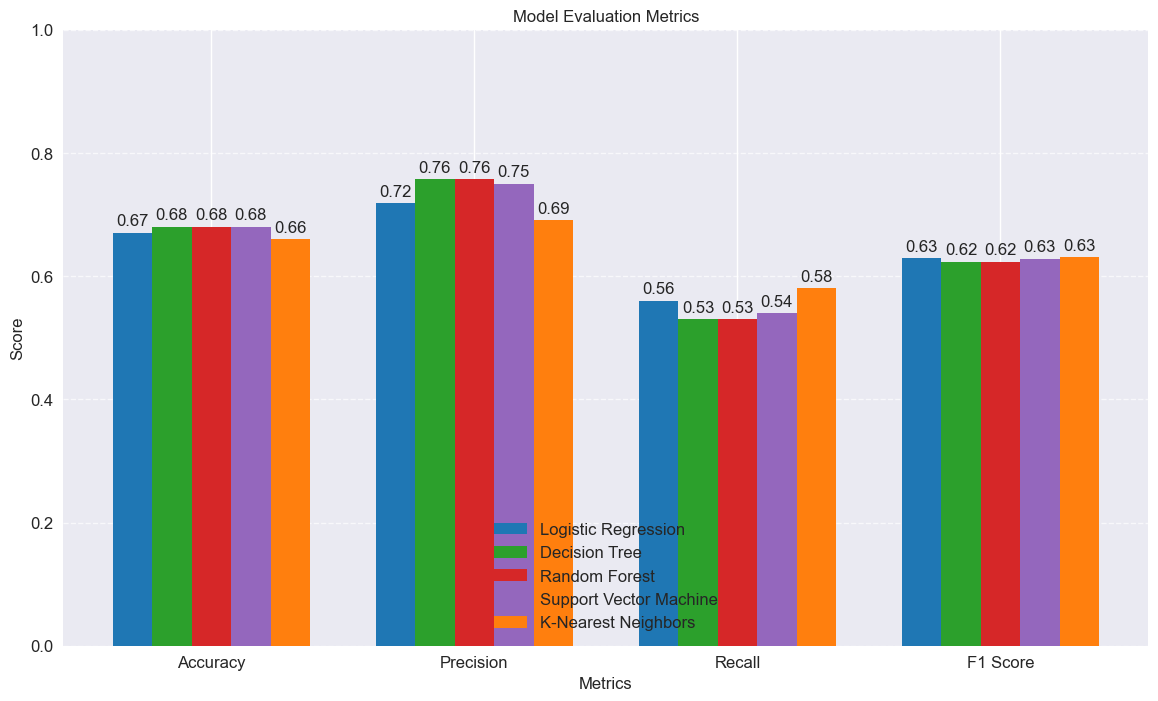

In [73]:
barplots = []
fig, axs = plt.subplots(figsize=(14, 8))

for i, (model, model_name) in enumerate(classifiers):
    model_scores = []
    model_scores.append(accuracy_scores.get(model))
    model_scores.append(precision_scores.get(model))
    model_scores.append(recall_scores.get(model))
    model_scores.append(f1_scores.get(model))
    
    # Adjust the position of bars to create space between them
    x_position = np.arange(len(model_scores)) + (i * bar_width)
    barplot = axs.bar(x_position, model_scores, bar_width, color=colors[i], label=model_name)
    for bar in barplot:
            height = bar.get_height()
            axs.annotate('{}'.format(round(height, 2)),
                         xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')
    barplots.append(barplot)
    
    
# Add labels, legends, and titles
axs.set_xticks(np.arange(len(model_scores)) + ((len(classifiers) - 1) * bar_width) / 2)
axs.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1 Score'])
axs.legend([model_name for (model_name,_) in classifiers], loc='lower center')  

plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.ylim(0, 1)  # Set y-axis limit
# plt.tight_layout()
plt.savefig(f"model-Comparision-four_way_additive_heterogeneous.png",dpi=300,bbox_inches='tight')
plt.show()

In [74]:
# Iterate through classifiers and generate reports
for name, classifier in classifiers:
    generate_report(name, confusion_matrices[name], accuracy_scores[name], 
                    precision_scores[name], recall_scores[name], f1_scores[name])

Classifier: Logistic Regression
Confusion Matrix:
[[78 22]
 [44 56]]
Accuracy: 0.67
Precision: 0.72
Recall: 0.56
F1 Score: 0.63
Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.78      0.70       100
           0       0.72      0.56      0.63       100

    accuracy                           0.67       200
   macro avg       0.68      0.67      0.67       200
weighted avg       0.68      0.67      0.67       200



Classifier: Decision Tree
Confusion Matrix:
[[83 17]
 [47 53]]
Accuracy: 0.68
Precision: 0.76
Recall: 0.53
F1 Score: 0.62
Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.83      0.72       100
           0       0.76      0.53      0.62       100

    accuracy                           0.68       200
   macro avg       0.70      0.68      0.67       200
weighted avg       0.70      0.68      0.67       200



Classifier: Random Forest
Confusion Matrix:
[[

In [75]:
# Create a DataFrame
evaluation_results = pd.DataFrame({
    'Accuracy': accuracy_scores.values(),
    'Precision': precision_scores.values(),
    'Recall': recall_scores.values(),
    'F1 Score': f1_scores.values()
}, index=accuracy_scores.keys())

# Display the DataFrame
evaluation_results

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.67,0.717949,0.56,0.629213
Decision Tree,0.68,0.757143,0.53,0.623529
Random Forest,0.68,0.757143,0.53,0.623529
Support Vector Machine,0.68,0.750000,0.54,0.627907
K-Nearest Neighbors,0.66,0.690476,0.58,0.630435


In [76]:
evaluation_results.sort_values(by=list(evaluation_results.columns),ascending=False)

,Accuracy,Precision,Recall,F1 Score
Decision Tree,0.68,0.757143,0.53,0.623529
Random Forest,0.68,0.757143,0.53,0.623529
Support Vector Machine,0.68,0.750000,0.54,0.627907
Logistic Regression,0.67,0.717949,0.56,0.629213
K-Nearest Neighbors,0.66,0.690476,0.58,0.630435
